In [5]:
# 1. 파이썬 코드에서 Matplotlib 폰트 설정
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import timedelta
from itertools import combinations
from collections import Counter

# 폰트 설정
plt.rc('font', family='Malgun Gothic')
# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print("한글 폰트 설정이 완료되었습니다.")


한글 폰트 설정이 완료되었습니다.


In [6]:
# 3. 데이터 로드 및 통합 (모든 문제 풀이의 시작점)
# dataframe 확인해라!
try:
    orders_df = pd.read_csv('../data/orders.csv')
    payments_df = pd.read_csv('../data/payments.csv')
    products_df = pd.read_csv('../data/products.csv')
    shipping_df = pd.read_csv('../data/shipping.csv')
    customers_df = pd.read_csv('../data/customers.csv')

    # 모든 데이터프레임 병합
    df = pd.merge(orders_df, payments_df, on='order_id', how='left')
    df = pd.merge(df, products_df, on='product_id', how='left')
    df = pd.merge(df, customers_df, on='customer_id', how='left')
    df = pd.merge(df, shipping_df, on='order_id', how='left')

    # 데이터 전처리
    date_cols = ['order_date', 'payment_date', 'join_date', 'shipping_start_date', 'shipping_end_date']
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    df['total_sales'] = df['quantity'] * df['price']
    
    print("데이터 로드 및 통합이 완료되었습니다.")

except FileNotFoundError as e:
    print(f"파일을 찾을 수 없습니다: {e}")


데이터 로드 및 통합이 완료되었습니다.


In [ ]:
# 문제 6: 월별 판매량 상위 10%에 속하는 상품들의 카테고리 분포 변화를 추적하세요.
# 시각화: 누적 영역 차트

# 비즈니스 목적: 시장 트렌드 변화를 파악하고, 어떤 종류의 상품들이 인기를 얻고 있는지 시간에 따른 변화를 관찰합니다.

In [7]:
# 출력 결과를 보고 코딩하세요
df.columns

Index(['order_id', 'customer_id', 'product_id', 'order_date', 'quantity',
       'payment_id', 'payment_method', 'payment_status', 'payment_date',
       'product_name', 'category', 'price', 'stock', 'name', 'gender', 'age',
       'join_date', 'city', 'shipping_id', 'shipping_company',
       'shipping_status', 'shipping_start_date', 'shipping_end_date',
       'total_sales'],
      dtype='object')

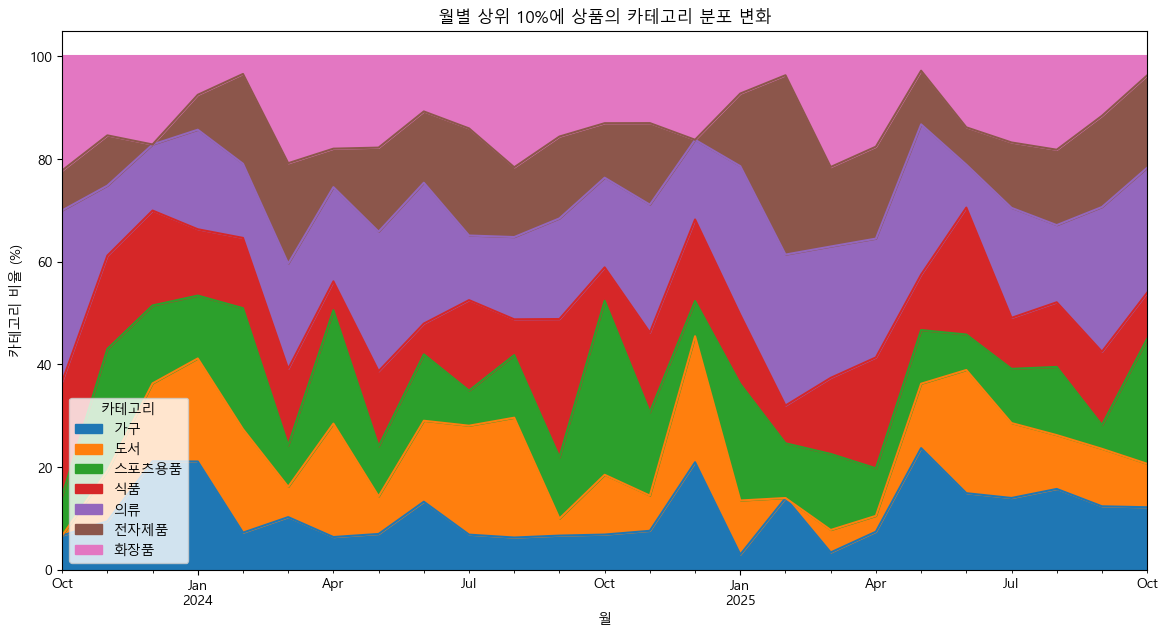

In [43]:
# 월별 판매량 상위 10%에 속하는 상품들의 카테고리 분포 변화를 누적 영역 차트로
# 6.1 필요한 컬럼: order_date, 'product_id', quantity, category 과 월별 컬럼 가져오기
df_quest6 = df[['order_date', 'product_id', 'category', 'quantity']].copy()
df_quest6['year_month'] = df_quest6['order_date'].dt.to_period('M')

# 6.1 월별, 상품별 판매량 합계
monthly_product_sales = (
  df_quest6
  .groupby(['year_month', 'product_id', 'category'])
  ['quantity'].sum()
  .reset_index()
)
# monthly_product_sales # 데이터 확인용

# 6.2 각 월별로 상위 10% 상품 선별
top_10p_products = monthly_product_sales[
    monthly_product_sales.groupby('year_month')['quantity']
    .rank(pct=True, ascending=False, method='first') <= 0.1
].copy()
# top_10p_products  # 데이터 확인용
# 6.3 상위 10% 상품들의 카테고리별 판매량 집계
sales_by_category = (
    top_10p_products
    .groupby(['year_month', 'category'])
    ['quantity'].sum()
    .reset_index() # df로 만들기
    .assign( # 비율 계산하기
        pct=lambda df: df.groupby('year_month')['quantity'].transform(lambda x: x / x.sum() * 100)
    )    
)
# sales_by_category # 데이터 확인용

# 6.4 pivot하여 누적 영역 차트용 데이터 준비
pivot_for_plot = sales_by_category.pivot(
    index='year_month' 
    , columns='category' 
    #,  values='quantity'
    , values = 'pct'
).fillna(0)
# pivot_for_plot # 데이터 확인용
# 각 행(월)의 카테고리 값을 합하고 그걸 다시 각각의 컬럼으로 나눈 후 * 100 해서 비율 
# pivot_percentage = pivot_for_plot.div(pivot_for_plot.sum(axis=1), axis=0) * 100
# pivot_percentage

# 6.5차트 그리기
pivot_for_plot.plot(kind='area', stacked=True, figsize=(14, 7))
plt.title('월별 상위 10%에 상품의 카테고리 분포 변화')
plt.xlabel('월')
plt.ylabel('카테고리 비율 (%)')
plt.legend(loc='lower left', title='카테고리')
plt.show()

In [ ]:
'''  
plt.legen(loc='') 주요 옵션
'upper left' - 좌측 상단
'upper right' - 우측 상단 (기본값)
'lower left' - 좌측 하단
'lower right' - 우측 하단
'center' - 중앙
'upper center' - 상단 중앙
'lower center' - 하단 중앙
'center left' - 좌측 중앙
'center right' - 우측 중앙
'best' - 자동으로 최적 위치
'''

###### 출력결과 : 
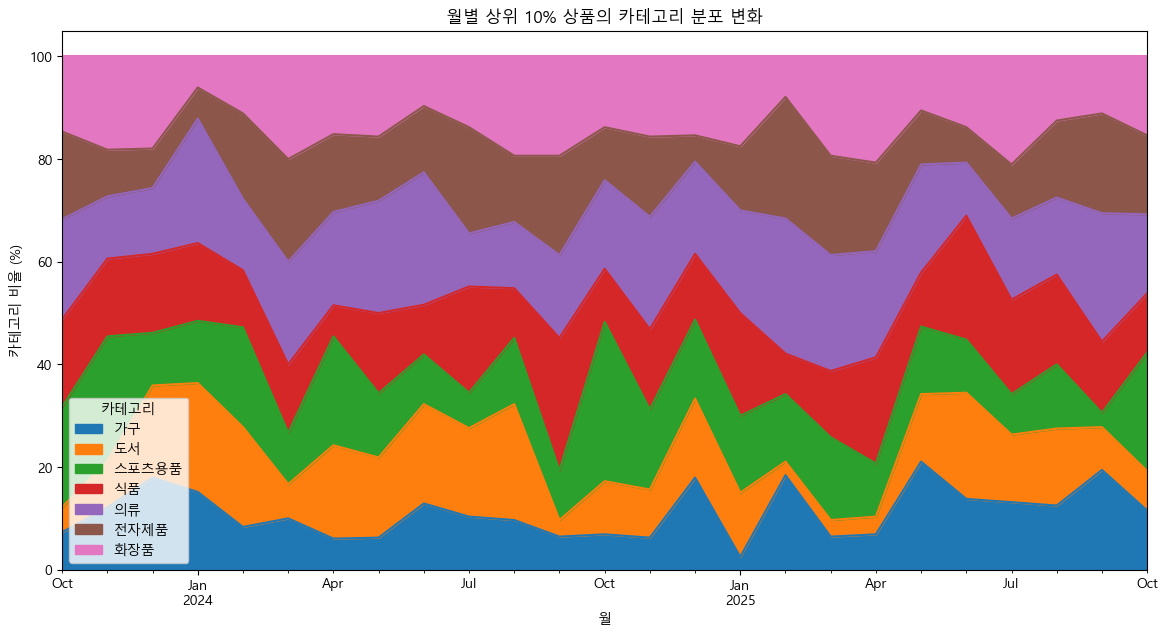